In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [8]:
with open('../data/letter_frequency.json', 'r') as file:
    frequency = json.load(file)
    frequency = pd.Series(frequency).to_frame()
    frequency['letter'] = frequency.index
    frequency['prob'] = frequency[0] / 100
    frequency.index = np.arange(0, len(frequency))
    frequency = frequency.drop(columns=[0])
    frequency['cumsum'] = np.cumsum(frequency.prob)

In [9]:
with open('../data/messages.txt', 'r') as file:
    lines = [line.strip() for line in file]

In [10]:
ciphers = []
for line in lines:
    byte_arr = bytes.fromhex(line)
    unique_char = set(byte_arr)
    b_freq = []
    for b in unique_char:
        b_freq.append(byte_arr.count(b) / len(byte_arr))
    ciphers.append(np.array(b_freq))

In [11]:
for idx, c in enumerate(ciphers):
    ciphers[idx] = np.cumsum(c)

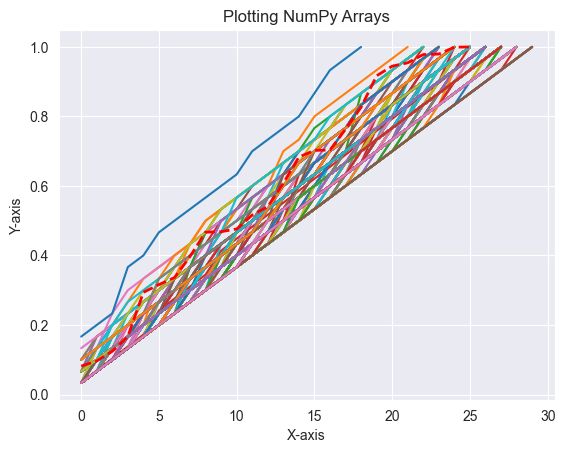

In [12]:
for array in ciphers:
    plt.plot(array)

extra_array = np.array(frequency['cumsum'])
plt.plot(extra_array, label='Extra Array', linestyle='--', color='red', linewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting NumPy Arrays')
plt.grid(True)  # Optional: Add legend
plt.show()

In [243]:
from scipy.stats import ks_2samp

In [264]:
main_cdf = frequency['cumsum']

# List of other CDFs
other_cdfs = [np.sort(cipher) for cipher in ciphers]

# Compute KS statistic for each other CDF
ks_distances = []
for cdf in other_cdfs:
    ks_statistic, _ = ks_2samp(main_cdf, cdf)
    ks_distances.append(ks_statistic)

# Sort by distance
sorted_indices = np.argsort(ks_distances)

# Print or use the sorted list of other CDFs
sorted_other_cdfs = [other_cdfs[i] for i in sorted_indices]

In [265]:
sorted_indices

array([170, 101,  78, 289, 140, 278, 169, 181,  41,  15,  23,  77, 232,
       265, 234, 129, 287,  28, 145, 146, 268, 128, 305,  91, 240,   7,
         1, 220, 205,   6, 219, 213, 134,  71,  70,  25,  12, 209, 199,
       254, 296, 137, 121, 300,  81, 119,  85,  86, 114, 269, 273, 110,
       105, 215, 153, 147, 245, 201,  29, 196,  35,  36, 186, 185, 246,
        19,  18, 319, 173, 172, 223,  14,  51, 198, 280, 279, 197, 276,
       151, 252, 242, 230, 188, 187, 217, 149, 164, 267, 216, 104, 120,
       233, 239, 255, 226, 214, 177, 130, 258, 207, 206, 275,  52, 317,
        60,  58,  24,  16, 315, 302,  53,  75,  31,   9,   5,  64, 286,
        99,  46,  93, 189, 313,  61, 308, 236,  26, 301, 154, 306, 316,
       176, 303, 171, 237, 160, 241,  45, 194, 202, 231, 238,  32, 190,
       175, 283,  21,  65, 290,  80,  82, 117, 323, 218, 204,   2, 224,
       284,  95,  96,  97,  98,  92,  10, 123, 136, 184, 141,  20,  67,
       259, 297, 262, 183, 227, 132, 260,  13, 293, 210, 135, 31

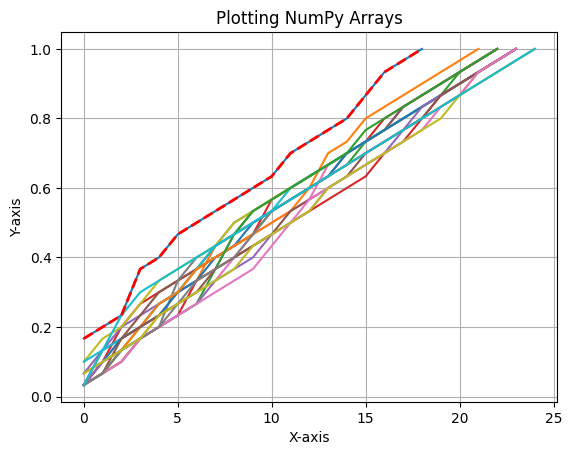

In [270]:
for idx in sorted_indices[:20]:
    plt.plot(np.sort(ciphers[idx]))

extra_array = np.array(frequency['cumsum'])
plt.plot(np.sort(ciphers[sorted_indices[0]]), label='Extra Array', linestyle='--', color='red', linewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting NumPy Arrays')
plt.grid(True)  # Optional: Add legend
plt.show()

In [251]:
def get_plain(cipher, char):
    bs = bytes.fromhex(cipher)
    ascii_value = ord(char)
    xored_bytes = bytes([b ^ ascii_value for b in bs])
    return xored_bytes.decode('ascii', errors='ignore')

In [271]:
def find_key():
    cipher = lines[170]
    bs = bytes.fromhex(cipher)
    e = ord('e')
    keys = bytes([b ^ e for b in bs])
    return keys

In [279]:
def decode(keys, cipher):
    bs = bytes.fromhex(cipher)
    for key in keys:
        print(chr(key))
        xored_plain = bytes([key ^ b for b in bs])
        print(xored_plain.decode('ascii', errors='ignore'))

In [280]:
# '5' is the key
decode(find_key(), lines[170])


eD\_CJ__CN[JY_RBXA^F[BEL!
?
De}*~bk~*~bo*zkx~s*cy*`gzcdm 
'
\}e2fzsf2fzw2bs`fk2{a2xgb{|u
p
*2e1-$1e1- e5$71<e,6e/0(5,+"O
$
_~f1eype1eyt1apceh1xb1{d|axv
8
Cbz-yely-yeh-}lyt-d~-gx`}dcj
1
Jks$plep$pla$tevp}$mw$nqitmjc
$
_~f1eype1eyt1apceh1xb1{d|axv
p
*2e1-$1e1- e5$71<e,6e/0(5,+"O
$
_~f1eype1eyt1apceh1xb1{d|axv
8
Cbz-yely-yeh-}lyt-d~-gx`}dcj
5
Now that the party is jumping

p
*2e1-$1e1- e5$71<e,6e/0(5,+"O
 
[zb5a}ta5a}p5etgal5|f5`xe|{r
1
Jks$plep$pla$tevp}$mw$nqitmjc
"
Yx`7cvc7cr7gvecn7~d7}bzg~yp
$
_~f1eype1eyt1apceh1xb1{d|axv
)
Rsk<ht}h<hty<l}nhe<uo<viqlur{
p
*2e1-$1e1- e5$71<e,6e/0(5,+"O
9
Bc{,xdmx,xdi,|m~xu,e,fya|ebk
#
Xya6b~wb6b~s6fwdbo6e6|c{fxq
p
*2e1-$1e1- e5$71<e,6e/0(5,+"O
:
A`x/{gn{/{gj/n}{v/f|/ezbfah
%
^g0dxqd0dxu0`qbdi0yc0ze}`y~w
=
Fg(|`i|(|`m(xiz|q(a{(b}exafo
 
[zb5a}ta5a}p5etgal5|f5`xe|{r
9
Bc{,xdmx,xdi,|m~xu,e,fya|ebk
>
Ed|+cj+cn+{jyr+bx+a~f{bel
7
Lmu"vjcv"vjg"rcpv{"kq"hworkl
Z
! OO
OOOe
